In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
x.shape

(150, 2)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

We can use NumPy's $bincount$ function, which counts the number of occurrences
of each value in an array, to verify that this is indeed the case:

In [7]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [8]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [9]:
np.bincount(y_test)

array([15, 15, 15], dtype=int64)

In [10]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [11]:
x_test[:10,:]

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3],
       [4.5, 1.7],
       [4.4, 1.4],
       [4. , 1.3],
       [5.8, 1.8],
       [4.5, 1.5],
       [5.3, 1.9],
       [1.3, 0.4]])

In [12]:
x_test_std[:10,:]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121],
       [ 0.39625036,  0.65926081],
       [ 0.34047786,  0.2659518 ],
       [ 0.11738784,  0.1348488 ],
       [ 1.12129291,  0.79036381],
       [ 0.39625036,  0.3970548 ],
       [ 0.84243039,  0.92146681],
       [-1.38846976, -1.04507821]])

In [13]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [14]:
y_pred = ppn.predict(x_test_std)

In [24]:
#error "" --- Missing prediction
(y_test != y_pred).sum()

1

In [16]:
#Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [17]:
print("Accuracy : %.3f" %accuracy)

Accuracy : 0.978


In [18]:
#Accuracy = score
score = ppn.score(x_test_std, y_test)
print("Accuracy : %.3f" %score)

Accuracy : 0.978


In [19]:
def plot_decision_regions(x, y, classifier, resolution=0.02):
    #stetup marker generator and colormap
    markers = ("s", "x", "o", '^', 'v')
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min , x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min , x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), x2_max.max())
    
    #plot class examples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x = x[y == c1, 0], y = x[y == c1, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=c1, edgecolor='black')

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(x, y, classifier, resolution=0.02):
    # Set up marker generator and colormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), x2_max.max())
    
    # Plot class examples
    for idx, c in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c, 0], y=x[y == c, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=c, edgecolor="black")

    plt.legend(loc="upper left")
       

C:\Users\steph\AppData\Local\Temp\ipykernel_28472\3509887522.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == c, 0], y=x[y == c, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=c, edgecolor="black")


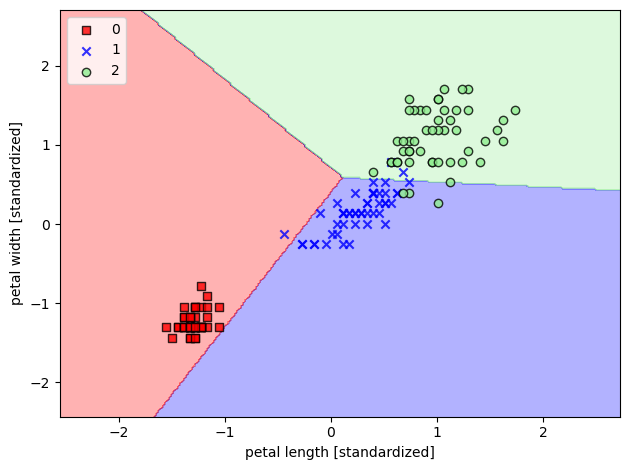

In [30]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x=x_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt 
import numpy as np 

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): 
    # setup marker generator and color map 
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))]) 
    
    # plot the decision surface 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape) 
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black') 
    # highlight test examples 
    if test_idx: 
        # plot all examples 
        X_test, y_test = X[test_idx, :], y[test_idx] 
        plt.scatter(X_test[:, 0], X_test[:, 1], c='green', edgecolor='black', alpha=0.3, linewidth=1, marker='o', s=100, label='test set') 


C:\Users\steph\AppData\Local\Temp\ipykernel_28472\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


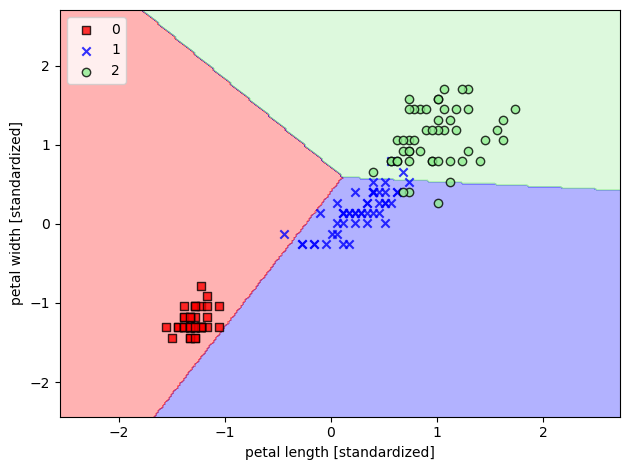

In [32]:
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()